In [1]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import seaborn as sns
import requests as req
import sys
import time
sys.path.insert(0, '../../../API_keys/')
from vantage_api import premium_key
import json

This file is too large to upload entirely to GitHub and most inputs are commented out. To run, upload the filled_reps_Data.csv from https://drive.google.com/drive/folders/1LG5bKuLBJXHF2HL9jAuEtyCQbmk8m3lS to the datasets folder. Then, run each line of code. We have the images of our EDA already saved and can be seen in the pics folder.

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('datasets/filled_reps_Data.csv') #Too large to push to GitHub if run

In [4]:
df.head()

Unnamed: 0 transaction_date ticker  \
0           0         6/3/2022    WFC   
1           3        5/31/2022      X   
2           4        5/20/2022   PYPL   
3           5        5/19/2022   PYPL   
4           6        5/16/2022  ABYIX   

                                  asset_description      type  amount  \
0                               Wells Fargo Company  purchase   15000   
1                   United States Steel Corporation  purchase  250000   
2                           PayPal Holdings, Inc. -  purchase  100000   
3                           PayPal Holdings, Inc. -  purchase  500000   
4  Abbey Capital Futures Strategy Fund- Class I Sha  purchase   15000   

                    name disclosure_date chamber first_name   last_name  \
0  A. Mitchell Mcconnell       6/13/2022  senate   Mitchell   McConnell   
1    Thomas H Tuberville       6/13/2022  senate     Thomas  Tuberville   
2    Thomas H Tuberville       6/13/2022  senate     Thomas  Tuberville   
3    Thomas H Tuberville       6/13/2022  senate     Thomas  Tuberville   
4        Thomas R Carper        6/3/2022  senate     Thomas      Carper   

        party   birthday gender represents       shares  start_value  \
0  Republican  2/20/1942      M         KY   334.672021      15000.0   
1  Republican  9/18/1954      M         AL  9972.078181     250000.0   
2  Republican  9/18/1954      M         AL  1241.619071     100000.0   
3  Republican  9/18/1954      M         AL  6151.574803     500000.0   
4    Democrat  1/23/1947      M         DE  1123.595506      15000.0   

   end_value start_date   end_date  start_price  end_price  purchase-sale  \
0   13765.06   6/3/2022  7/15/2022        44.82      41.13              0   
1  176804.95  5/31/2022  7/15/2022        25.07      17.73              0   
2   91768.07  5/20/2022  7/15/2022        80.54      73.91              0   
3  454662.89  5/19/2022  7/15/2022        81.28      73.91              0   
4   15404.49  5/16/2022  7/15/2022        13.35      13.71              0   

   1/2/2014  1/3/2014  1/4/2014  1/5/2014  1/6/2014  1/7/2014  1/8/2014  \
0         0       0.0         0         0       0.0       0.0       0.0   
1         0       0.0         0         0       0.0       0.0       0.0   
2         0       0.0         0         0       0.0       0.0       0.0   
3         0       0.0         0         0       0.0       0.0       0.0   
4         0       0.0         0         0       0.0       0.0       0.0   

   1/9/2014  1/10/2014  1/11/2014  1/12/2014  1/13/2014  1/14/2014  1/15/2014  \
0       0.0        0.0          0          0        0.0        0.0        0.0   
1       0.0        0.0          0          0        0.0        0.0        0.0   
2       0.0        0.0          0          0        0.0        0.0        0.0   
3       0.0        0.0          0          0        0.0        0.0        0.0   
4       0.0        0.0          0          0        0.0        0.0        0.0   

   1/16/2014  1/17/2014  1/18/2014  1/19/2014  1/20/2014  1/21/2014  \
0        0.0        0.0          0          0        0.0        0.0   
1        0.0        0.0          0          0        0.0        0.0   
2        0.0        0.0          0          0        0.0        0.0   
3        0.0        0.0          0          0        0.0        0.0   
4        0.0        0.0          0          0        0.0        0.0   

   1/22/2014  1/23/2014  1/24/2014  1/25/2014  1/26/2014  1/27/2014  \
0        0.0        0.0        0.0          0          0        0.0   
1        0.0        0.0        0.0          0          0        0.0   
2        0.0        0.0        0.0          0          0        0.0   
3        0.0        0.0        0.0          0          0        0.0   
4        0.0        0.0        0.0          0          0        0.0   

   1/28/2014  1/29/2014  1/30/2014  1/31/2014  2/1/2014  2/2/2014  2/3/2014  \
0        0.0        0.0        0.0        0.0         0         0       0.0   
1        0.0        

In [5]:
df.drop(columns='Unnamed: 0',inplace=True)
df.columns

Index(['transaction_date', 'ticker', 'asset_description', 'type', 'amount',
       'name', 'disclosure_date', 'chamber', 'first_name', 'last_name',
       ...
       '7/6/2022', '7/7/2022', '7/8/2022', '7/9/2022', '7/10/2022',
       '7/11/2022', '7/12/2022', '7/13/2022', '7/14/2022', '7/15/2022'],
      dtype='object', length=3139)

The '7/15/2022' is at the last column in the dataframe and is the value of the trade

In [6]:
val_dict = {}
for i in df.name.unique():
    val = 0
    for j in df.index:
        if df['name'][j] == i:
            val += df['7/15/2022'][j]
    val_dict.update({i:val})
df['values'] = df['name'].map(lambda x: val_dict[x])
df.head()

transaction_date ticker                                 asset_description  \
0         6/3/2022    WFC                               Wells Fargo Company   
1        5/31/2022      X                   United States Steel Corporation   
2        5/20/2022   PYPL                           PayPal Holdings, Inc. -   
3        5/19/2022   PYPL                           PayPal Holdings, Inc. -   
4        5/16/2022  ABYIX  Abbey Capital Futures Strategy Fund- Class I Sha   

       type  amount                   name disclosure_date chamber first_name  \
0  purchase   15000  A. Mitchell Mcconnell       6/13/2022  senate   Mitchell   
1  purchase  250000    Thomas H Tuberville       6/13/2022  senate     Thomas   
2  purchase  100000    Thomas H Tuberville       6/13/2022  senate     Thomas   
3  purchase  500000    Thomas H Tuberville       6/13/2022  senate     Thomas   
4  purchase   15000        Thomas R Carper        6/3/2022  senate     Thomas   

    last_name       party   birthday gender represents       shares  \
0   McConnell  Republican  2/20/1942      M         KY   334.672021   
1  Tuberville  Republican  9/18/1954      M         AL  9972.078181   
2  Tuberville  Republican  9/18/1954      M         AL  1241.619071   
3  Tuberville  Republican  9/18/1954      M         AL  6151.574803   
4      Carper    Democrat  1/23/1947      M         DE  1123.595506   

   start_value  end_value start_date   end_date  start_price  end_price  \
0      15000.0   13765.06   6/3/2022  7/15/2022        44.82      41.13   
1     250000.0  176804.95  5/31/2022  7/15/2022        25.07      17.73   
2     100000.0   91768.07  5/20/2022  7/15/2022        80.54      73.91   
3     500000.0  454662.89  5/19/2022  7/15/2022        81.28      73.91   
4      15000.0   15404.49  5/16/2022  7/15/2022        13.35      13.71   

   purchase-sale  1/2/2014  1/3/2014  1/4/2014  1/5/2014  1/6/2014  1/7/2014  \
0              0         0       0.0         0         0       0.0       0.0   
1              0         0       0.0         0         0       0.0       0.0   
2              0         0       0.0         0         0       0.0       0.0   
3              0         0       0.0         0         0       0.0       0.0   
4              0         0       0.0         0         0       0.0       0.0   

   1/8/2014  1/9/2014  1/10/2014  1/11/2014  1/12/2014  1/13/2014  1/14/2014  \
0       0.0       0.0        0.0          0          0        0.0        0.0   
1       0.0       0.0        0.0          0          0        0.0        0.0   
2       0.0       0.0        0.0          0          0        0.0        0.0   
3       0.0       0.0        0.0          0          0        0.0        0.0   
4       0.0       0.0        0.0          0          0        0.0        0.0   

   1/15/2014  1/16/2014  1/17/2014  1/18/2014  1/19/2014  1/20/2014  \
0        0.0        0.0        0.0          0          0        0.0   
1        0.0        0.0        0.0          0          0        0.0   
2        0.0        0.0        0.0          0          0        0.0   
3        0.0        0.0        0.0          0          0        0.0   
4        0.0        0.0        0.0          0          0        0.0   

   1/21/2014  1/22/2014  1/23/2014  1/24/2014  1/25/2014  1/26/2014  \
0        0.0        0.0        0.0        0.0          0          0   
1        0.0        0.0        0.0        0.0          0          0   
2        0.0        0.0        0.0        0.0          0          0   
3        0.0        0.0        0.0        0.0          0          0   
4        0.0        0.0        0.0        0.0          0          0   

   1/27/2014  1/28/2014  1/29/2014  1/30/2014  1/31/2014  2/1/2014  2/2/2014  \
0        0.0        0.0        0.0        0.0        0.0         0         0   
1        0.0        0.0        0.0        0.0        0.0         0         0   
2        0.0        0.0        0.0        0.0        0.0         0         0   
3        0.0        0.0   

Now that we have the final values, let's do some EDA

In [7]:
millions_list = [n for n in val_dict if val_dict[n] >= 1000000]
millions_list

['Michael T. McCaul', 'Greg Gianforte']

We have 2 Senators/Representatives that made over a million dollars in trades. Let's examin them.

In [8]:
look_at = ['name', 'chamber', 'party', 'birthday', 'gender', 'represents', 'values']
df[df['name'] == 'Michael T. McCaul'][look_at].head(1)

,name,chamber,party,birthday,gender,represents,values
4083,Michael T. McCaul,house,Republican,1/14/1962,M,TX10,1222119.31


In [9]:
df[df['name'] == 'Greg Gianforte'][look_at].head(1)

,name,chamber,party,birthday,gender,represents,values
4115,Greg Gianforte,house,Republican,4/17/1961,M,MT00,1228094.15


Let's look at the data as a whole to see if there are any indicators to see who benifits in Congress.

<AxesSubplot:xlabel='party', ylabel='values'>

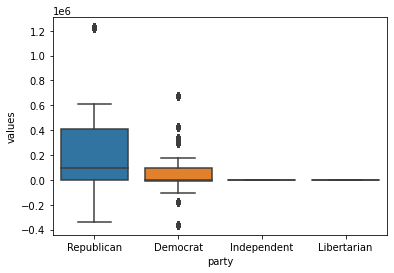

In [10]:
sns.boxplot(data=df, x='party', y='values')

This shows that the Republicans tend to make more in stock trades than the Democrats

<AxesSubplot:xlabel='gender', ylabel='values'>

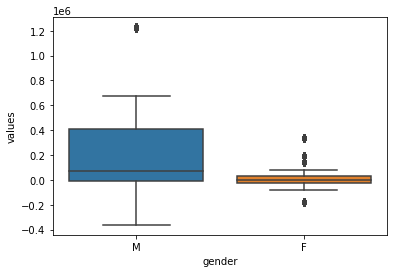

In [11]:
sns.boxplot(data=df, x='gender', y='values')

Males in Congress seem to make more than females.

<AxesSubplot:xlabel='chamber', ylabel='values'>

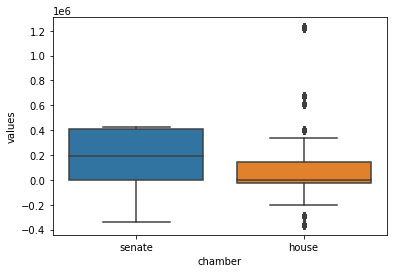

In [12]:
sns.boxplot(data=df, x='chamber', y='values')

Senators seem to make more than the House members

In [13]:
df.head()

transaction_date ticker                                 asset_description  \
0         6/3/2022    WFC                               Wells Fargo Company   
1        5/31/2022      X                   United States Steel Corporation   
2        5/20/2022   PYPL                           PayPal Holdings, Inc. -   
3        5/19/2022   PYPL                           PayPal Holdings, Inc. -   
4        5/16/2022  ABYIX  Abbey Capital Futures Strategy Fund- Class I Sha   

       type  amount                   name disclosure_date chamber first_name  \
0  purchase   15000  A. Mitchell Mcconnell       6/13/2022  senate   Mitchell   
1  purchase  250000    Thomas H Tuberville       6/13/2022  senate     Thomas   
2  purchase  100000    Thomas H Tuberville       6/13/2022  senate     Thomas   
3  purchase  500000    Thomas H Tuberville       6/13/2022  senate     Thomas   
4  purchase   15000        Thomas R Carper        6/3/2022  senate     Thomas   

    last_name       party   birthday gender represents       shares  \
0   McConnell  Republican  2/20/1942      M         KY   334.672021   
1  Tuberville  Republican  9/18/1954      M         AL  9972.078181   
2  Tuberville  Republican  9/18/1954      M         AL  1241.619071   
3  Tuberville  Republican  9/18/1954      M         AL  6151.574803   
4      Carper    Democrat  1/23/1947      M         DE  1123.595506   

   start_value  end_value start_date   end_date  start_price  end_price  \
0      15000.0   13765.06   6/3/2022  7/15/2022        44.82      41.13   
1     250000.0  176804.95  5/31/2022  7/15/2022        25.07      17.73   
2     100000.0   91768.07  5/20/2022  7/15/2022        80.54      73.91   
3     500000.0  454662.89  5/19/2022  7/15/2022        81.28      73.91   
4      15000.0   15404.49  5/16/2022  7/15/2022        13.35      13.71   

   purchase-sale  1/2/2014  1/3/2014  1/4/2014  1/5/2014  1/6/2014  1/7/2014  \
0              0         0       0.0         0         0       0.0       0.0   
1              0         0       0.0         0         0       0.0       0.0   
2              0         0       0.0         0         0       0.0       0.0   
3              0         0       0.0         0         0       0.0       0.0   
4              0         0       0.0         0         0       0.0       0.0   

   1/8/2014  1/9/2014  1/10/2014  1/11/2014  1/12/2014  1/13/2014  1/14/2014  \
0       0.0       0.0        0.0          0          0        0.0        0.0   
1       0.0       0.0        0.0          0          0        0.0        0.0   
2       0.0       0.0        0.0          0          0        0.0        0.0   
3       0.0       0.0        0.0          0          0        0.0        0.0   
4       0.0       0.0        0.0          0          0        0.0        0.0   

   1/15/2014  1/16/2014  1/17/2014  1/18/2014  1/19/2014  1/20/2014  \
0        0.0        0.0        0.0          0          0        0.0   
1        0.0        0.0        0.0          0          0        0.0   
2        0.0        0.0        0.0          0          0        0.0   
3        0.0        0.0        0.0          0          0        0.0   
4        0.0        0.0        0.0          0          0        0.0   

   1/21/2014  1/22/2014  1/23/2014  1/24/2014  1/25/2014  1/26/2014  \
0        0.0        0.0        0.0        0.0          0          0   
1        0.0        0.0        0.0        0.0          0          0   
2        0.0        0.0        0.0        0.0          0          0   
3        0.0        0.0        0.0        0.0          0          0   
4        0.0        0.0        0.0        0.0          0          0   

   1/27/2014  1/28/2014  1/29/2014  1/30/2014  1/31/2014  2/1/2014  2/2/2014  \
0        0.0        0.0        0.0        0.0        0.0         0         0   
1        0.0        0.0        0.0        0.0        0.0         0         0   
2        0.0        0.0        0.0        0.0        0.0         0         0   
3        0.0        0.0   

Let's make the columns more usable. 

In [14]:
df['senate'] = df['chamber'].map(lambda x: 1 if x == 'senate' else 0)
df['republican'] = df['party'].map(lambda x: 1 if x == 'Republican' else 0)
df['male'] = df['gender'].map(lambda x: 1 if x == 'M' else 0)
df['age'] = df['birthday'].map(lambda x: 2022 - int(x[-4::]))

In [15]:
df_heat = df[['senate', 'republican', 'male', 'age', 'values']]

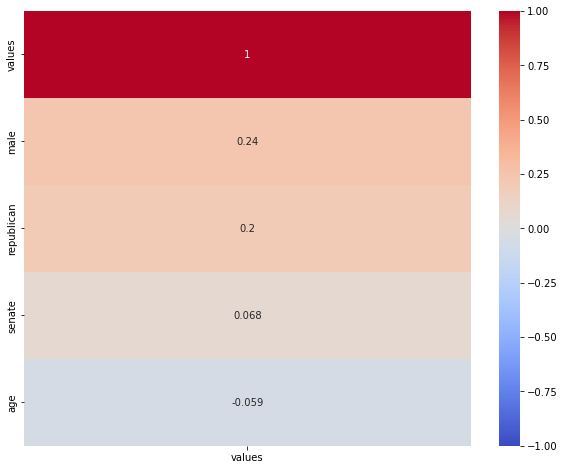

In [16]:
plt.figure(figsize=(10,8))
sns.heatmap(df_heat.corr()[['values']].sort_values(by='values',ascending=False),
            annot = True,
            vmin = -1,
            vmax = 1,
            cmap = 'coolwarm');

It seems like the best predictor of the returns rate is whether or not the trader was male. Males make more than females in the Congress. However, it isn't too strongly correlated.

<AxesSubplot:xlabel='age', ylabel='values'>

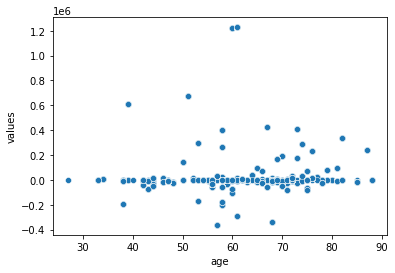

In [17]:
sns.scatterplot(data=df_heat,x='age',y='values')

This shows the distrabution of earnings by age.

Finally, let's see what percent actually make money on the market, as opposed to loosing

In [18]:
names_len = len(df['name'].unique())
names_len

184

In [19]:
ratio = 0
for i in df['name'].unique():
    if val_dict[i] > 0:
        ratio += 1
ratio /= names_len
ratio

0.27717391304347827

Only 27.72% of Congress humans actually make a profit on the stock market.